# Import necessary libraries

In [165]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')

# Load the dataset and perform initial data exploration

In [166]:
df = pd.read_csv(r'C:\Users\Mustafa\Desktop\DataSet\gold_monthly_csv.csv')

In [167]:
df.head()

,Date,Price
0,1950-01,34.73
1,1950-02,34.73
2,1950-03,34.73
3,1950-04,34.73
4,1950-05,34.73


In [168]:
df.shape

(847, 2)

In [169]:
df.columns

Index(['Date', 'Price'], dtype='object')

In [170]:
print(f"Date range of Gold Prices - {df.loc[:,'Date'][0]} to {df.loc[:,'Date'][len(df)-1]}")

Date range of Gold Prices - 1950-01 to 2020-07


# Create a date range for monthly data

In [171]:
date = pd.date_range (start ='1/1/1950', end='8/1/2020', freq = 'M')
date

DatetimeIndex(['1950-01-31', '1950-02-28', '1950-03-31', '1950-04-30',
               '1950-05-31', '1950-06-30', '1950-07-31', '1950-08-31',
               '1950-09-30', '1950-10-31',
               ...
               '2019-10-31', '2019-11-30', '2019-12-31', '2020-01-31',
               '2020-02-29', '2020-03-31', '2020-04-30', '2020-05-31',
               '2020-06-30', '2020-07-31'],
              dtype='datetime64[ns]', length=847, freq='M')

In [172]:
df['month'] = date
df.drop('Date', axis = 1, inplace = True )
df = df.set_index('month')
df.head()

,Price
month,
1950-01-31,34.73
1950-02-28,34.73
1950-03-31,34.73
1950-04-30,34.73
1950-05-31,34.73


In [173]:
df.columns

Index(['Price'], dtype='object')

# Explore statistical summary of the dataset

In [174]:
round(df.describe(),3)

,Price
count,847.000
mean,416.557
std,453.665
min,34.490
25%,35.190
50%,319.622
75%,447.029
max,1840.807


# Visualize data distribution and trends over the years

# - Create a boxplot of gold prices by year

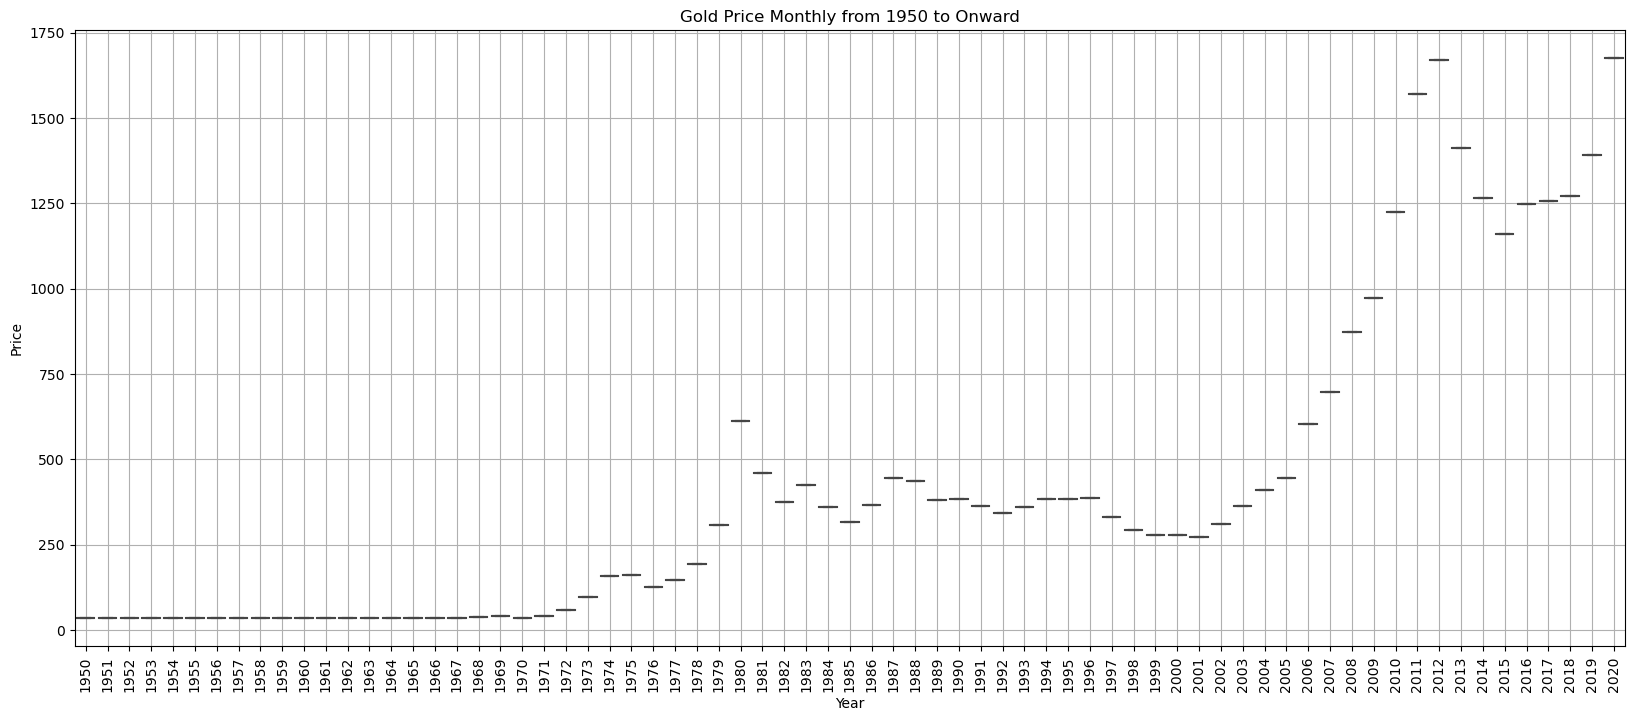

In [175]:
df['Year'] = df.index.year
yearly_data = df.groupby('Year')['Price'].mean().reset_index()

_, ax = plt.subplots(figsize=(20, 8))
sns.boxplot(x='Year', y='Price', data=yearly_data, showfliers=True, ax=ax)
plt.title("Gold Price Monthly from 1950 to Onward")
plt.xlabel('Year')
plt.xticks(rotation=90)
plt.grid()
plt.show()

# Create a month plot to visualize monthly patterns

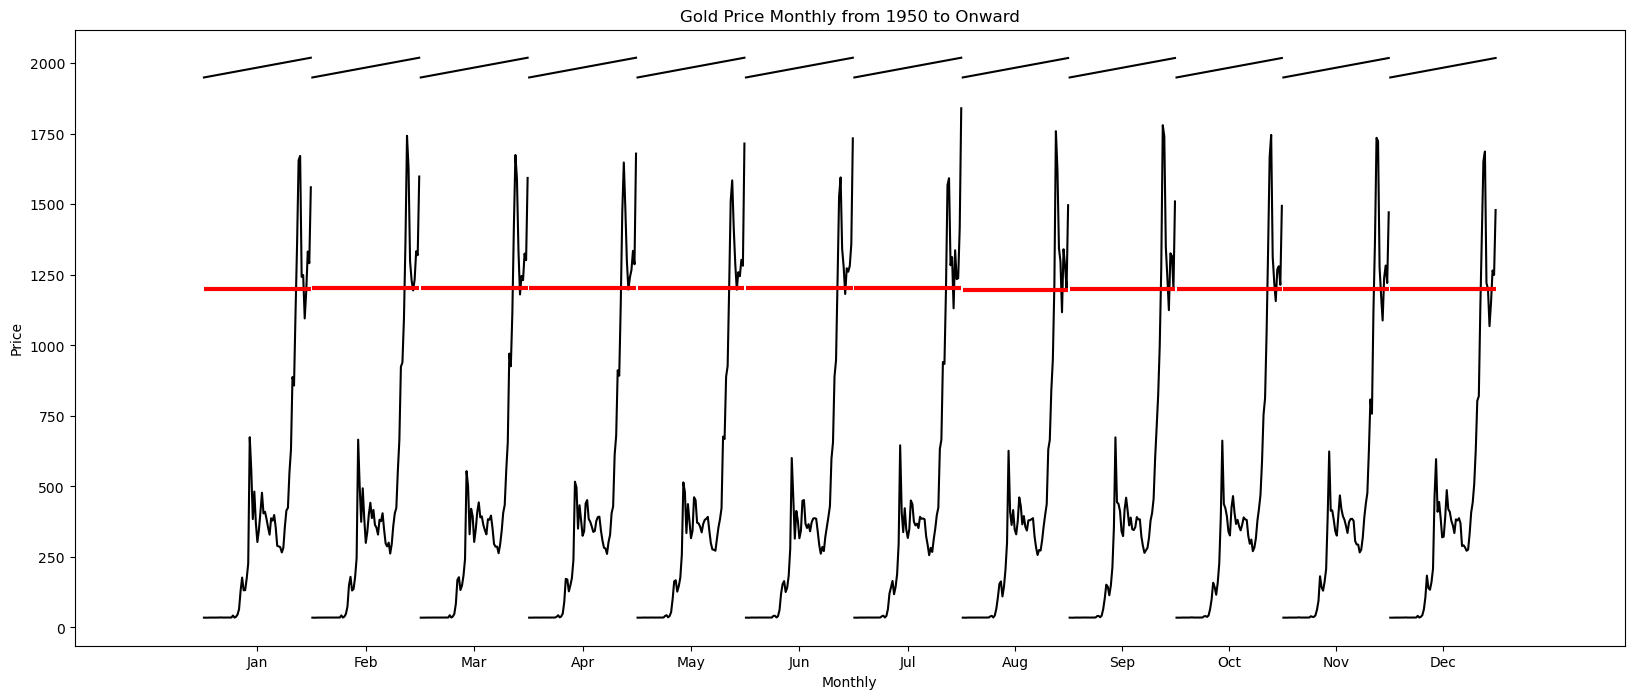

In [176]:
from statsmodels.graphics.tsaplots import month_plot

fig, ax = plt.subplots(figsize = (20,8))
month_plot(df, ylabel = 'Gold Price', ax = ax)
plt.title("Gold Price Monthly from 1950 to Onward")
plt.xlabel('Monthly')
plt.ylabel('Price')
plt.show()

# Resample data to analyze on a yearly, quarterly, and decade-wise basis


# - Yearly average gold price

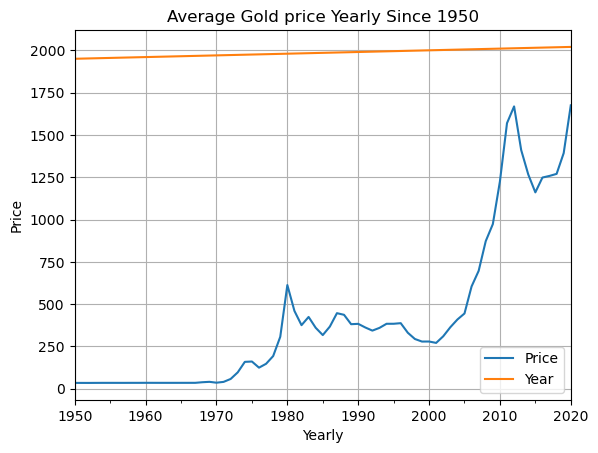

In [177]:
df_yearlysum = df.resample('A').mean()
df_yearlysum.plot()
plt.title('Average Gold price Yearly Since 1950')
plt.xlabel('Yearly')
plt.ylabel('Price')
plt.grid()
plt.show()

# - Quarterly average gold price

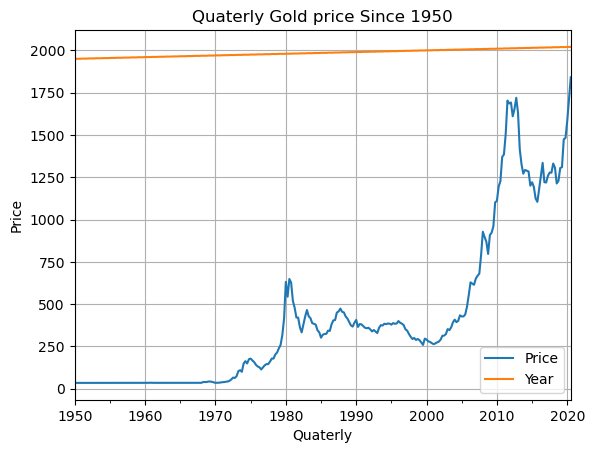

In [178]:
df_quaterly = df.resample('Q').mean()
df_quaterly.plot()
plt.title('Quaterly Gold price Since 1950')
plt.xlabel('Quaterly')
plt.ylabel('Price')
plt.grid()
plt.show()

# - Decade average gold price

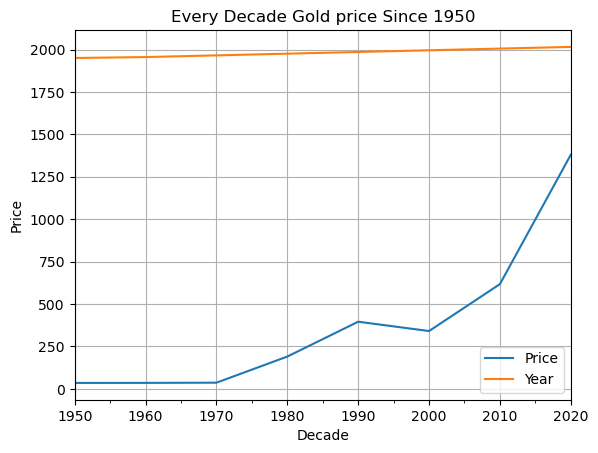

In [179]:
df_decade = df.resample('10Y').mean()
df_decade.plot()
plt.title('Every Decade Gold price Since 1950')
plt.xlabel('Decade')
plt.ylabel('Price')
plt.grid()
plt.show()

# Calculate statistics for the dataset, including mean, standard deviation, and coefficient of variation

In [180]:
df_1 = df.groupby(df.index.year).mean().rename(columns={'Price': 'Mean'})
df_1 = df_1.merge(df.groupby(df.index.year).std().rename(columns={'Price': 'Std'}), left_index=True, right_index=True)
df_1['Cov_pct'] = ((df_1['Std'] / df_1['Mean']) * 100).round(2)
df_1.head()

,Mean,Year_x,Std,Year_y,Cov_pct
month,,,,,
1950,34.729167,1950.0,0.002887,0.0,0.01
1951,34.717500,1951.0,0.020057,0.0,0.06
1952,34.628333,1952.0,0.117538,0.0,0.34
1953,34.879167,1953.0,0.056481,0.0,0.16
1954,35.020000,1954.0,0.082792,0.0,0.24


# Plot the coefficient of variation (CV) over the years

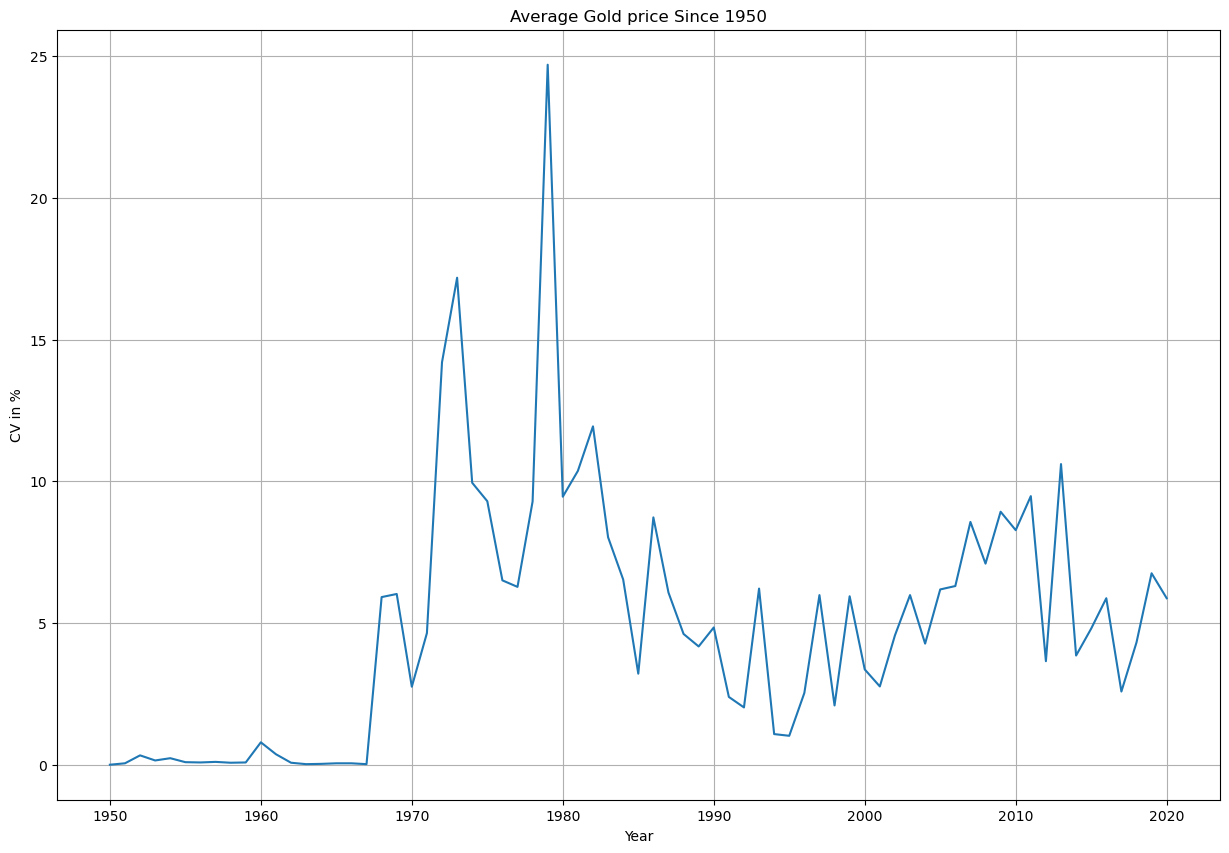

In [181]:
fig, ax = plt.subplots(figsize = (15,10))
df_1['Cov_pct'].plot()
plt.title('Average Gold price Since 1950')
plt.xlabel('Year')
plt.ylabel('CV in %')
plt.grid()
plt.show()

# Split the data into training and testing sets based on the year

In [182]:
train = df[df.index.year <= 2015]
test = df[df.index.year > 2015]

# Visualize the training and testing data

In [183]:
print(train.shape)
print(test.shape)

(792, 2)
(55, 2)


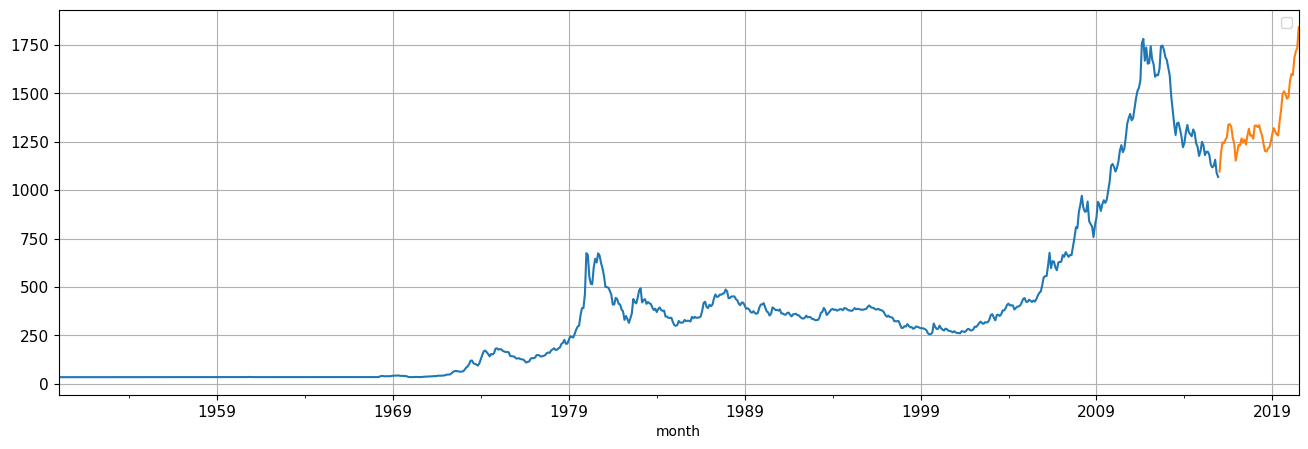

In [184]:
train['Price'].plot(figsize = (16,5), fontsize = 11 )
test['Price'].plot(figsize = (16,5), fontsize = 11 )
plt.grid()
plt.legend('Traning Data', 'Test Data')
plt.show()

# Prepare data for linear regression on time

In [185]:
train_time = [i + 1 for i in range (len(train))]
test_time = [i + len(train) + 1 for i in range(len(test))]
len(train_time), len(test_time)

(792, 55)

# Fit a linear regression model to the training data and make predictions

In [186]:
LR_train = train.copy()
LR_test = test.copy()

In [187]:
LR_train['time'] = train_time
LR_test['time'] =test_time

In [188]:
lr = LinearRegression()
lr.fit(LR_train[['time']], LR_train['Price'].values)

LinearRegression()

# Visualize the linear regression forecast

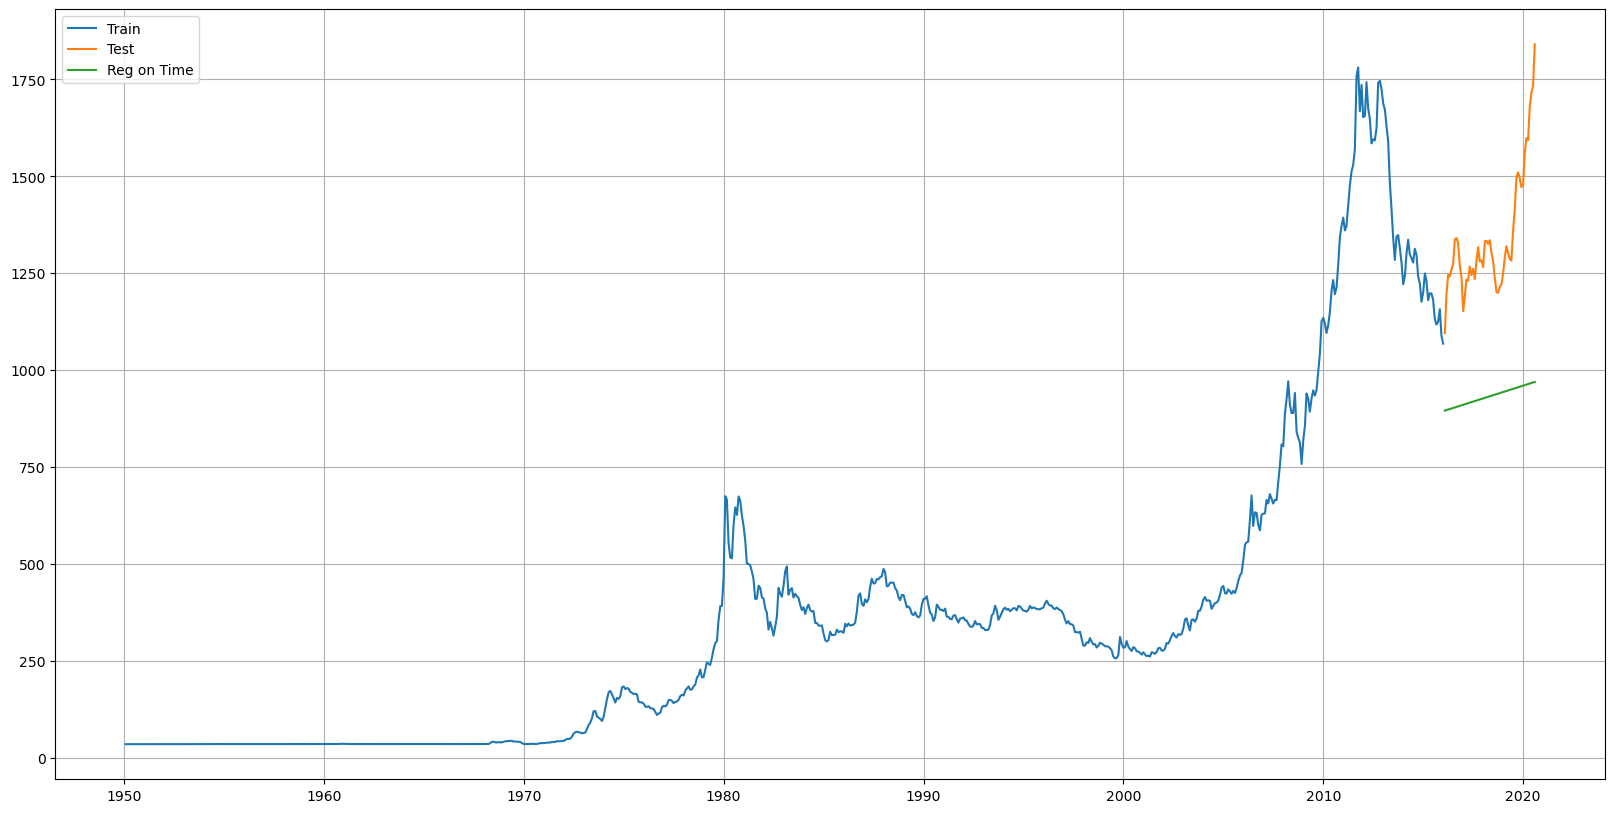

In [189]:
test_predict_model = lr.predict(LR_test[['time']])
LR_test['forcast'] = test_predict_model

plt.figure(figsize = (20,10))
plt.plot(train['Price'], label = 'Train')
plt.plot(test['Price'], label = 'Test')
plt.plot(LR_test['forcast'], label = 'Reg on Time')
plt.legend(loc = 'best')
plt.grid()

# Calculate the Mean Absolute Percentage Error (MAPE) for the linear regression forecast

In [190]:
def mape(actual, pred): 
    return round((np.mean(abs(actual - pred)/actual))*100,2)

In [191]:
mape_model1_test = mape(test['Price'].values,test_predict_model)
print('Mape is %3.3f'%(mape_model1_test), "%")

Mape is 29.760 %


# Create a DataFrame to store and compare MAPE results

In [192]:
results = pd.DataFrame({'Test Mape(%)' : [mape_model1_test]}, index = ["RegressionOnTime"])
results

,Test Mape(%)
RegressionOnTime,29.76


# Naive Model: Forecast using the last observed value

In [193]:
Naive_train = train.copy()
Naive_test = test.copy()

In [194]:
Naive_test['naive'] = np.asarray(train['Price'])[len(np.asarray(train['Price']))-1]
Naive_test['naive'].head()

month
2016-01-31    1068.317
2016-02-29    1068.317
2016-03-31    1068.317
2016-04-30    1068.317
2016-05-31    1068.317
Name: naive, dtype: float64

# Visualize the naive forecast

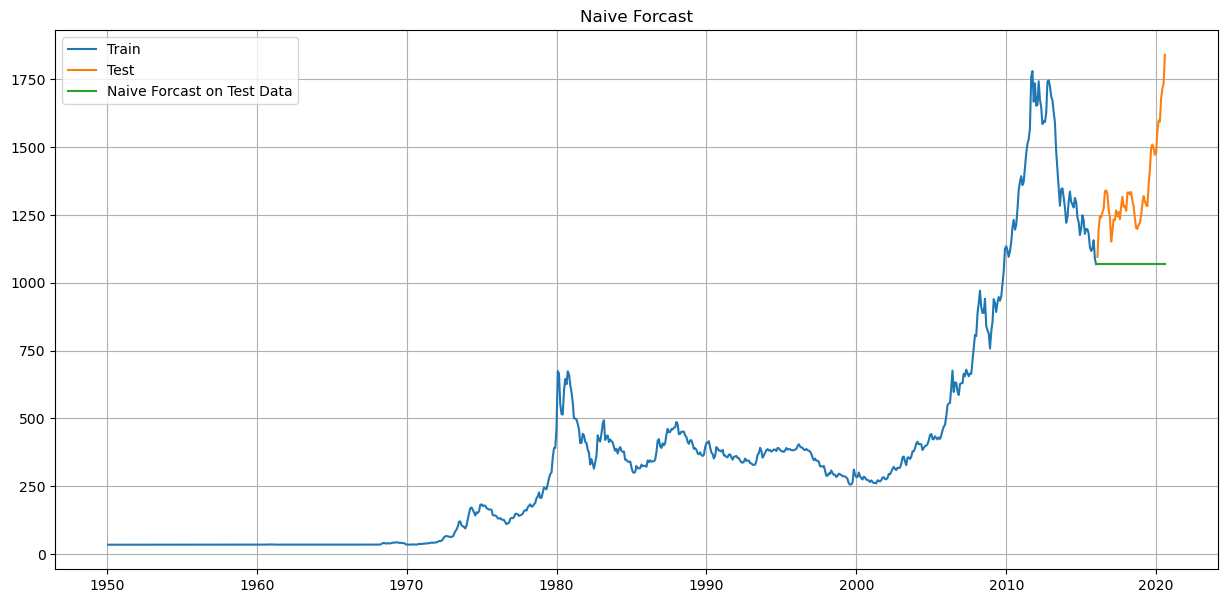

In [195]:
plt.figure(figsize = (15,7))
plt.plot(Naive_train['Price'], label = 'Train')
plt.plot(test['Price'], label = 'Test')
plt.plot(Naive_test['naive'], label = 'Naive Forcast on Test Data')
plt.legend(loc = 'best')
plt.title('Naive Forcast')
plt.grid()

# Calculate the MAPE for the naive forecast

In [196]:
mape_model2_test = mape(test['Price'].values,Naive_test['naive'].values)
print('For Naive Forcast on the Test Data, Mape is %3.3f'%(mape_model2_test), "%")

For Naive Forcast on the Test Data, Mape is 19.380 %


# Add the results of the naive model to the results DataFrame

In [197]:
results2 = pd.DataFrame({'Test Mape(%)' : [mape_model2_test]}, index = ["NaiveModel"])
results = pd.concat([results, results2])
results

,Test Mape(%)
RegressionOnTime,29.76
NaiveModel,19.38


# Exponential Smoothing model for time series forecasting

In [203]:
final_model = ExponentialSmoothing(df['Price'],
                                  trend = 'additive',
                                  seasonal = 'additive').fit(smoothing_level = 0.4,
                                                            smoothing_trend = 0.3,
                                                            smoothing_seasonal = 0.6)

# Calculate MAPE for the Exponential Smoothing model

In [204]:
Mape_Final_Model = mape(df['Price'].values, final_model.fittedvalues)
print('MAPE:',Mape_Final_Model )

MAPE: 17.24


# Forecast future values using the Exponential Smoothing model

In [206]:
predictions = final_model.forecast(steps = len(test))

# Create a DataFrame to store forecasted values and confidence intervals

In [210]:
pred_df = pd.DataFrame({'lower_CI': predictions -1.96*np.std(final_model.resid, ddof = 1),
                       'prediction': predictions,
                       'upper_CI' : predictions + 1.96*np.std(final_model.resid, ddof = 1)})
pred_df.head()

,lower_CI,prediction,upper_CI
2020-08-31,1684.718274,1792.869246,1901.020219
2020-09-30,1615.301815,1723.452788,1831.603760
2020-10-31,1538.560879,1646.711851,1754.862823
2020-11-30,1476.748832,1584.899804,1693.050776
2020-12-31,1459.315210,1567.466182,1675.617154


# Visualize the actual and forecasted values with confidence intervals

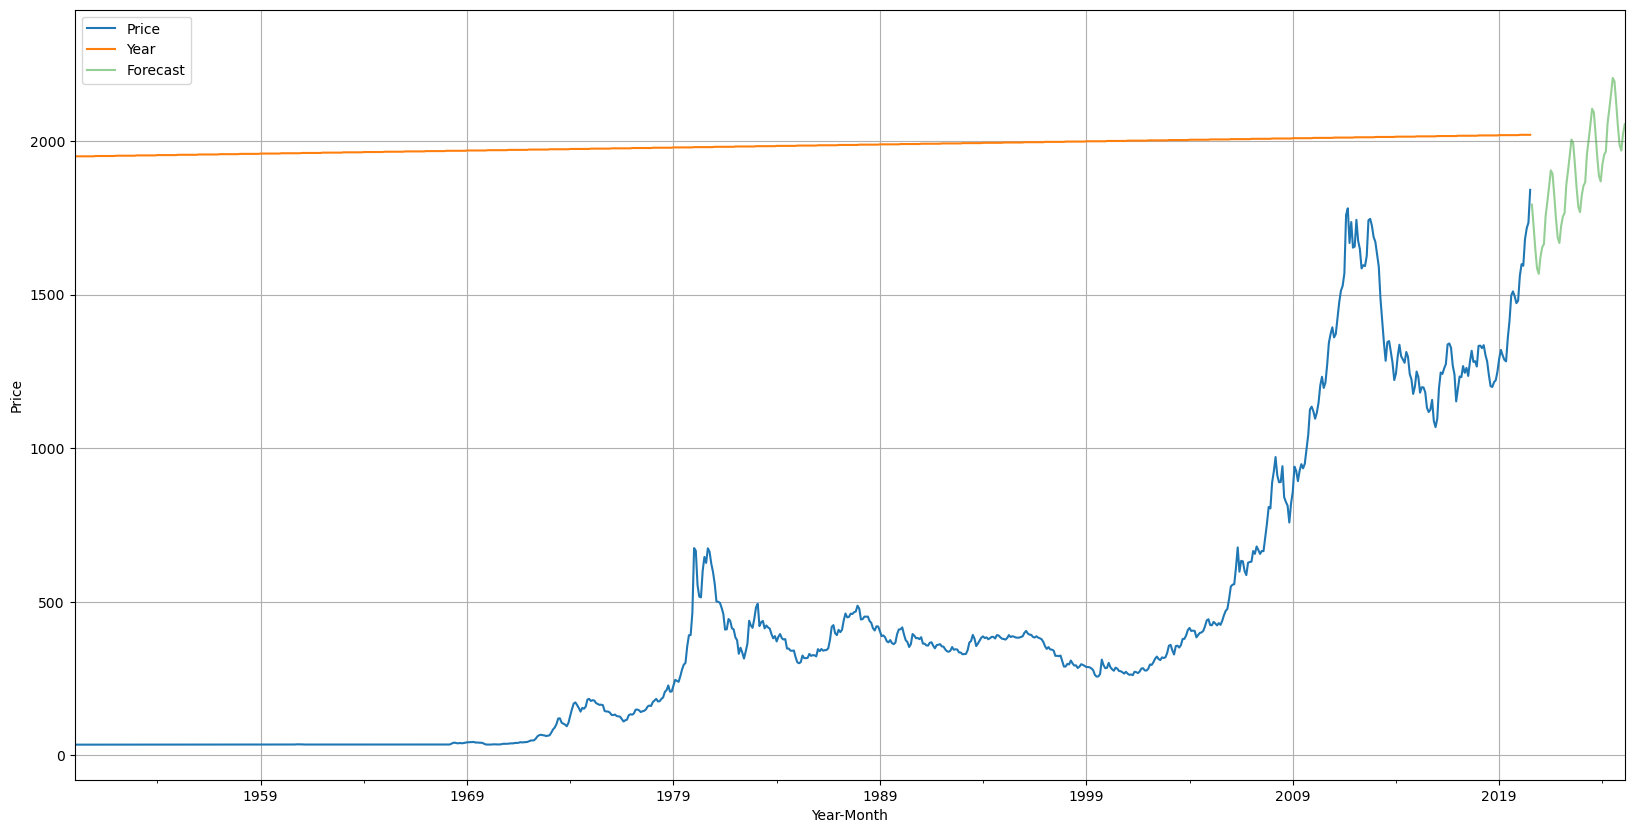

In [212]:
axis = df.plot(label = 'Actual', figsize = (20,10))
pred_df['prediction'].plot(ax = axis, label = 'Forecast', alpha = 0.5)
axis.fill_between(pred_df.index, pred_df['lower_CI'], pred_df['upper_CI'], color = 'm', alpha = 0.15)
axis.set_xlabel('Year-Month')
axis.set_ylabel('Price')
plt.legend(loc = 'best')
plt.grid()
plt.show()